In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [8.57, 5.33, 2.43, 24.94, 29.99, 34.03, 10.41, 18.23, 21.47, 31.48]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,8.57
1,London,51.5085,5.33
2,Oslo,59.9127,2.43
3,Beijing,39.9075,24.94
4,Mumbai,19.0144,29.99
5,Manila,14.6042,34.03
6,New York,40.7143,10.41
7,Seattle,47.6062,18.23
8,Dallas,32.7668,21.47
9,Taipei,25.0478,31.48


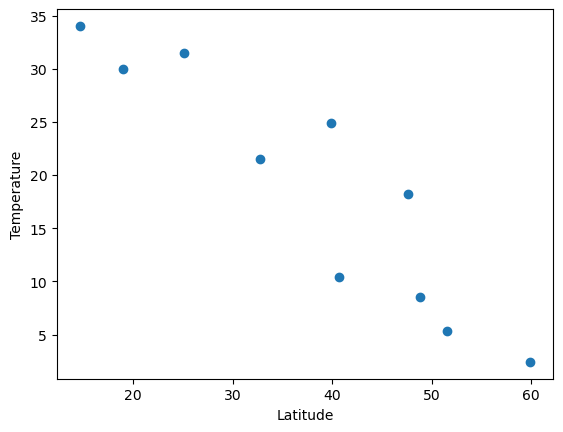

In [5]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [8]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    10.952009
1     9.060649
2     3.073919
3    17.324619
4    32.207816
5    35.349421
6    16.749896
7    11.840452
8    22.411296
9    27.909924
Name: lat, dtype: float64


In [9]:
# Create line equation string
line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
line_eq

'y = -0.71x + 45.75'

The r-value is: 0.848993047979826


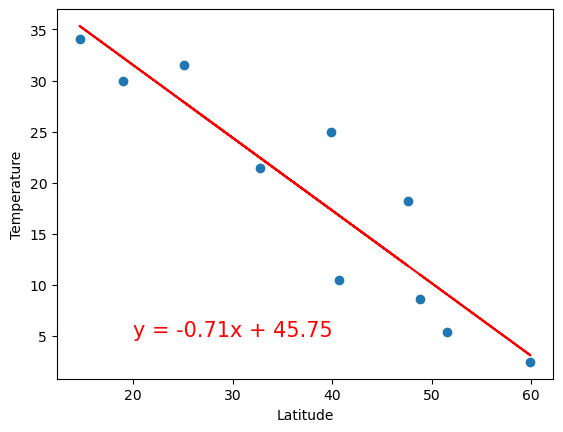

In [10]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [11]:
# Calculate the temperature for Florence at 43.77 degrees
lat = 43.77
predicted_temp = round(slope * lat + intercept, 2)

print(f"Predicted temp for Florence: {predicted_temp}")

Predicted temp for Florence: 14.57


In [13]:
# Use API to determine actual temperature
florence_url = query_url + "Florence"

response = requests.get(florence_url).json()
print(f"Florence actual temp: {response['main']['temp']}")

Florence actual temp: 14.86
